In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pets-are/images/american_pit_bull_terrier_16.jpg
/kaggle/input/pets-are/images/leonberger_200.jpg
/kaggle/input/pets-are/images/english_cocker_spaniel_35.jpg
/kaggle/input/pets-are/images/Siamese_67.jpg
/kaggle/input/pets-are/images/boxer_77.jpg
/kaggle/input/pets-are/images/saint_bernard_146.jpg
/kaggle/input/pets-are/images/american_bulldog_37.jpg
/kaggle/input/pets-are/images/Sphynx_239.jpg
/kaggle/input/pets-are/images/Egyptian_Mau_164.jpg
/kaggle/input/pets-are/images/Birman_116.jpg
/kaggle/input/pets-are/images/english_setter_178.jpg
/kaggle/input/pets-are/images/Siamese_110.jpg
/kaggle/input/pets-are/images/newfoundland_39.jpg
/kaggle/input/pets-are/images/pug_84.jpg
/kaggle/input/pets-are/images/yorkshire_terrier_47.jpg
/kaggle/input/pets-are/images/Abyssinian_217.jpg
/kaggle/input/pets-are/images/havanese_41.jpg
/kaggle/input/pets-are/images/miniature_pinscher_50.jpg
/kaggle/input/pets-are/images/chihuahua_170.jpg
/kaggle/input/pets-are/images/american_pit_bull_t

In [6]:
from fastai.vision.all import *
import ipywidgets as widgets

In [7]:
path = untar_data(URLs.PETS)/'images'
def is_Cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed = 42, label_func=is_Cat, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 193MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.165584,0.014619,0.005413,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.063085,0.033776,0.010149,00:34


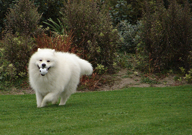

In [10]:
img = PILImage.create('/kaggle/input/pets-are/images/samoyed_141.jpg')
img.to_thumb(192)

In [12]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [13]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f'Is this a cat?: {is_cat}')
print(f"Probability its a car: {probs[1].item():.6f}")

Is this a cat?: True
Probability its a car: 1.000000
